In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 调整子图周围的间距

subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

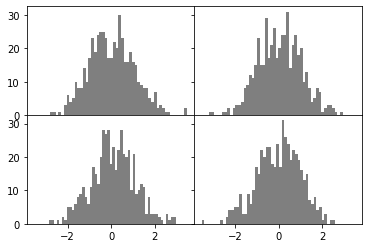

In [2]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)  # 调整子图周围的间距，margin

### 颜色、标记和线类型

ax.plot(x, y, 'g--')                            使用绿色的破折线绘制x, y  
ax.plot(x, y, linestyle='--', color='g')        与上面的写法等价  
ax.plot(x, y, linestyle='--', color='#00FF00')

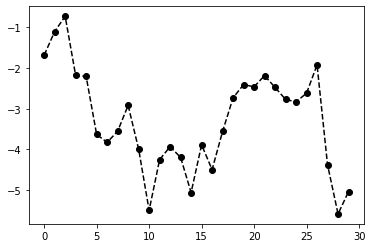

In [3]:
data = np.random.randn(30).cumsum()
# plt.plot(data, 'ko--')
plt.plot(data, color='k', linestyle='dashed', marker='o')  # 与上面等价

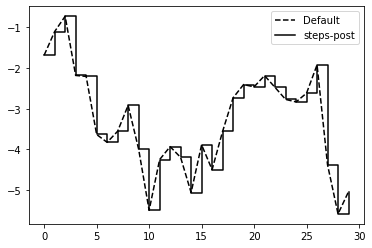

In [4]:
plt.close('all')
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')  # 生成图例（也可以使用ax.legend来生成图例），否则不显示图例

### 刻度、标签和图例

Text(0.5, 0, 'Stages')

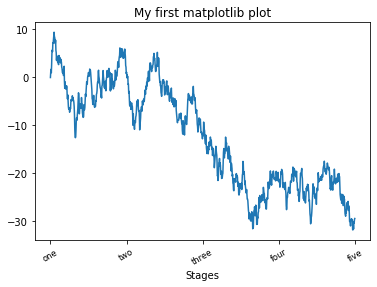

In [5]:
data = np.random.randn(1000).cumsum()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data)                                                # 一个简单的随机漫步图
ax.set_xticks([0, 250, 500, 750, 1000])                      # 设置x轴的刻度
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                   rotation=30, fontsize='small')            # 设置x轴刻度的标签
ax.set_title('My first matplotlib plot')                     # 设置子图的标题
ax.set_xlabel('Stages')                                      # 设置x轴名称

[Text(0, 0, 'one'),
 Text(250, 0, 'two'),
 Text(500, 0, 'three'),
 Text(750, 0, 'four'),
 Text(1000, 0, 'five')]

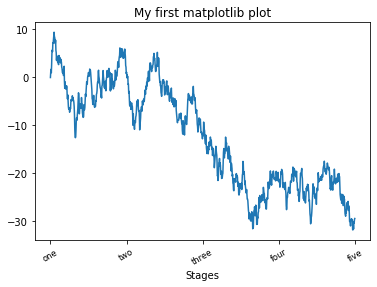

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data)
props = {
    'xticks': [0, 250, 500, 750, 1000],
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)  # 可以这样批量更改图的属性
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

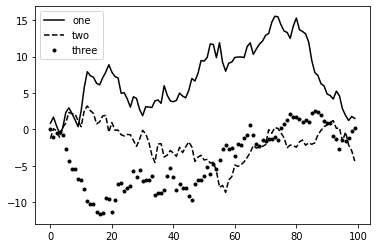

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(100).cumsum(), 'k', label='one')     # 添加图例
ax.plot(np.random.randn(100).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(100).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### 注释与子图加工

ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

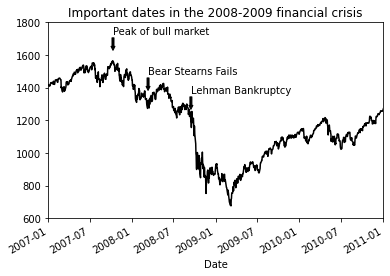

In [8]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('data/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']  # type: pd.Series

spx.plot(ax=ax, style='k-')
# ax.plot(spx, 'k-')  # 这样不行。。。

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', 
                verticalalignment='top'
               )

# 放大2007年-2010年
ax.set_xlim(['1/1/2007', '1/1/2011'])  # 设置图表x轴边界
ax.set_ylim([600, 1800])               # 设置图表y轴边界

ax.set_title('Important dates in the 2008-2009 financial crisis')

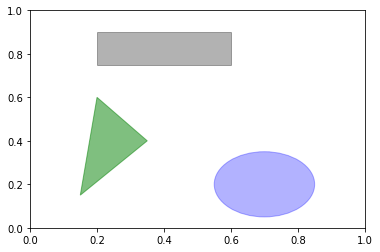

In [9]:
# matplotlib有一些表示常见图形的对象。这些对象被称为块（patches）。
# 其中有些（如Rectangle和Circle），可以在matplotlib.pyplot中找到，但完整集合位于matplotlib.patches

# fig = plt.figure(figsize=(12, 6))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 将图表保存到文件

In [10]:
# plt.savefig('figpath.svg')  # 图片类型使用文件名的扩展名自动推断的
# plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

# savefig并非一定要写入磁盘，也可以写入任何文件型的对象，比如BytesIO
"""
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
"""

'\nfrom io import BytesIO\nbuffer = BytesIO()\nplt.savefig(buffer)\nplot_data = buffer.getvalue()\n'

### matplotlib的全局设置

使用rc方法可以通过Python编程方式进行全局配置

In [11]:
plt.rc('figure', figsize=(10, 10))  # 全局默认图像大小为10*10

font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size' : 'small'}
plt.rc('font', **font_options)      # 批量进行全局的字体设置

ValueError: Key font.size: Could not convert 'small' to float